## Bag of Words, Lematización y Etiquetado Gramatical

El modelo bolsa de palabras (del inglés, Bag of Words, o BoW) es un método que se utiliza en el procesado del lenguaje para representar documentos ignorando el orden de las palabras. Con este modelo podemos tener una representación de cada documento, en función de las palabras que este contiene. En este notebook usaremos este modelo para representar el análisis de un artículo en Internet.

La lematización es un proceso lingüístico que consiste en, dada una forma flexionada (es decir, en plural, en femenino, conjugada, etc), hallar el lema correspondiente. El lema es la forma que por convenio se acepta como representante de todas las formas flexionadas de una misma palabra. Es decir, el lema de una palabra es la palabra que nos encontraríamos como entrada en un diccionario tradicional: singular para sustantivos, masculino singular para adjetivos, infinitivo para verbos. Por ejemplo, decir es el lema de dije, pero también de diré o dijéramos; guapo es el lema de guapas; mesa es el lema de mesas. En este notebook usaremos lematización de palabras para estandarizar los resultados del BoW.

El etiquetado gramatical (part-of-speech tagging, POS tagging o POST) es el proceso que recibe como entrada texto en algún lenguaje y como salida regresa un conjunto de pares de la forma palabra-etiqueta gramatical, basado en su definición y su contexto, categorías gramaticales como sustantivo, verbo, adjetivo, etc.

In [0]:
#@title <--  1. Instalar e inicializar librerías

!pip install newspaper3k
!python -m spacy download es_core_news_md

# Imports

import urllib.request
import operator
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import spacy
from spacy import displacy
from spacy.lang.es.stop_words import STOP_WORDS
import requests
import newspaper
from newspaper import Article 
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import pandas as pd
import seaborn as sns

import es_core_news_md
nlp = es_core_news_md.load()

✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_md')


(Todas estas palabras están lematizadas)


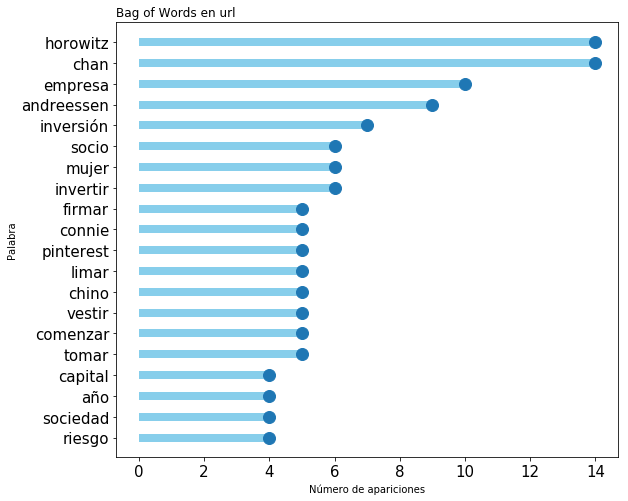

In [0]:
#@title <-- 2. Introduce URL a analizar y número de palabras
URL = "https://expansion.mx/tecnologia/2019/03/20/ella-es-la-encantadora-de-china-de-silicon-valley" #@param {type:"string"}
Number_of_words = 20 #@param {type:"integer"}
# Initializations

# Add stop words in spanish
STOP_WORDS.add('y')
STOP_WORDS.add('a')
STOP_WORDS.add('o')
STOP_WORDS.add('publicidad')
STOP_WORDS.add('expansion')
STOP_WORDS.add('para')
STOP_WORDS.add('“')
STOP_WORDS.add('“')
STOP_WORDS.add('\n')

# Punctuations to clean text
punctuations = '.¡!“"”#$%&\'()*+,-/:;<=>¿?@[\\]^_`{|}~©'

# URL to analyze
url = URL

# Number of words at the top
n = Number_of_words

# Obtener texto limpio de la url:
 
article = Article(url)
article.download()
article.parse()
#print(article.publish_date)  # left for debugging
#print(article.text)          # left for debugging
doc = nlp(article.text)

# convert to lowercase and remove leading and trailing spaces
clean = [tok.text.lower().strip() for tok in doc] 

# remove stop words
clean = [tok for tok in clean if tok not in STOP_WORDS] 

# remove punctuation
clean = [tok for tok in clean if tok not in punctuations]

# remove pronouns
clean = [tok for tok in clean if tok != '-PRON-']

# re-convert to SpaCy tokens
clean = " ".join(str(x) for x in clean)
clean = nlp(clean)

# lemmatize
clean = [tok.lemma_ for tok in clean]

# Find the most common tokens
word_freq = Counter(clean)
common_words = word_freq.most_common(n)

# Plot results

df = pd.DataFrame(common_words,columns=['Word','Count'],dtype=int)

plt.rc('xtick', labelsize=15)     
plt.rc('ytick', labelsize=15)

my_range=range(n)

vertical_size = n*0.4 if n < 30 else 20
horizontal_size = 9

plt.figure(figsize=(horizontal_size, vertical_size)) 

df = df.sort_values(by='Count')

# Add titles and axis names
plt.yticks(my_range, df['Word'])
plt.title("Bag of Words en url", loc='left')
plt.xlabel('Número de apariciones')
plt.ylabel('Palabra')

plt.hlines(y=my_range, xmin=0, xmax=df['Count'], color='skyblue', linewidth = 8)
plt.plot(df['Count'], my_range, "o", markersize=12)

print('(Todas estas palabras están lematizadas)')

In [0]:
#@title <-- 3. Mostrar entidades agrupadas por etiquetas
dfEntities = pd.DataFrame(columns=['Text','Label'])
df1 = pd.DataFrame(columns=['Text','Label'])

for entity in doc.ents:
    if str(entity) != '\n\n':
        df1 = pd.DataFrame({"Text": [entity.text.strip()], "Label": [entity.label_]})
        dfEntities = dfEntities.append(df1) 
dfEntities

dfEntities = dfEntities.sort_values(['Label', 'Text'], ascending=[True, True])
dfEntities = dfEntities.groupby(['Label', 'Text']).size()
dfEntities

Label  Text                                     
LOC    Asia                                         3
       Beijing                                      1
       Chan                                         7
       China                                        3
       Connie Chan                                  1
       Conocida                                     1
       Lime                                         2
       México                                       1
       Ofo                                          1
       Pinduoduo                                    1
       San Francisco                                1
       Sand Hill Road                               1
       Silicon Valley                               3
       en Estados Unidos                            2
MISC   Buscando la próxima gran inversión           1
       CEOs                                         1
       Chan                                         1
       Crunchbase                

In [0]:
#@title <-- 4. Mostrar texto, lemas, y formas gramaticales de tokens
 def get_html_keywords(self):

        meta_keywords = self.soup.find('meta', {'name': 'keywords'})
        if meta_keywords is not None:
            keywords = meta_keywords.get('content')
        else:
            print("\tCan't find meta keywords")
            keywords = ''
        return keywords

doc = nlp(article.text)

print("{0}\t{1}\t{2}\t{3}\t{4}\t{5}\t{6}\t{7}".format(
            'Texto',
            'Idx',
            'Lema',
            'is_punct',
            'is_space',
            'shape',
            'pos',
            'tag',
            #token.label
    ))

print('\r')

for token in doc:
    if len(token.text.strip()) > 2:
        print("{0}\t{1}\t{2}\t{3}\t{4}\t{5}\t{6}\t{7}".format(
            token.text,
            token.idx,
            token.lemma_,
            token.is_punct,
            token.is_space,
            token.shape_,
            token.pos_,
            token.tag_,
            #token.label
    ))

Texto	Idx	Lema	is_punct	is_space	shape	pos	tag

MICHELLE	0	MICHELLE	False	False	XXXX	PROPN	PROPN___
TOH	9	TOH	False	False	XXX	PROPN	PROPN___
HONG	14	HONG	False	False	XXXX	PROPN	PROPN___
KONG	19	KONG	False	False	XXXX	PROPN	PROPN___
Por	26	Por	False	False	Xxx	ADP	ADP__AdpType=Prep
años	30	año	False	False	xxxx	NOUN	NOUN__Gender=Masc|Number=Plur
sociedad	39	sociedad	False	False	xxxx	NOUN	NOUN__Gender=Fem|Number=Sing
capital	51	capital	False	False	xxxx	NOUN	NOUN__Gender=Fem|Number=Sing
riesgo	62	riesgo	False	False	xxxx	NOUN	NOUN__Gender=Masc|Number=Sing
Andreessen	69	Andreessen	False	False	Xxxxx	PROPN	PROPN___
Horowitz	80	Horowitz	False	False	Xxxxx	PROPN	PROPN___
seguía	89	seguir	False	False	xxxx	VERB	VERB__Mood=Ind|Number=Sing|Person=3|Tense=Imp|VerbForm=Fin
una	96	uno	False	False	xxx	DET	DET__Definite=Ind|Gender=Fem|Number=Sing|PronType=Art
regla	100	reglar	False	False	xxxx	NOUN	NOUN__Gender=Fem|Number=Sing
inquebrantable	106	inquebrantable	False	False	xxxx	ADJ	ADJ__Number=Sing
para	122	p

In [0]:
#@title <-- 5. Mostrar entidades y etiquetas
for ent in doc.ents:
    if len(ent.text.strip()) > 3:
        print(ent.text, ent.label_)

MICHELLE ORG
Andreessen Horowitz PER
CEOs MISC
Ben Horowitz PER
Connie Chan PER
Chan LOC
Pronto PER
Pinterest ORG
Lime ORG
También MISC
Asia LOC
Conocida LOC
China LOC
Silicon Valley LOC
Su promesa MISC
Horowitz MISC
Él recuerda haberla MISC
Publicidad

Lee MISC
Pinterest ORG
Connie PER
Connie PER
Horowitz MISC
Andreessen Horowitz PER
Chan LOC
Rompiendo MISC
Toby PER
Sand Hill Road LOC
Crunchbase MISC
All Raise ORG
El capítulo de Chan MISC
Andreessen Horowitz PER
China LOC
LinkedIn ORG
Eso eventualmente derivó en la entrevista MISC
Ben Horowitz PER
La confianza característica de Chan MISC
Mientras crecía en Bay Area MISC
Chan LOC
La gente pensaba que era penosa MISC
Recomendamos: ¡Adiós hippies! MISC
Silicon Valley LOC
San Francisco LOC
Cansada PER
Chan LOC
Universidad de Stanford ORG
Estoy muy abierta MISC
Chan MISC
Pero en lugar de sentirse MISC
Andreessen Horowitz PER
Pinterest ORG
Chan LOC
Ella buscó un acuerdo MISC
Andreessen Horowitz PER
Pinterest ORG
Connie Chan LOC
Lime LOC
Chi